This will serve as the sandbox, so smash the castles you don't need anymore alicia

In [374]:
# let's create our final data set:

import pandas as pd

from project_functions import *
import numpy as np

In [375]:
# cities = pd.read_csv('uscities.csv')
data = pd.read_csv('music_with_lyrics.csv')

In [376]:
data.head()

,Artist,Song,Wave,Year,Lyrics,Original Lyrics,Unnamed: 6,Unnamed: 7
0,Bikini Kill,Double Dare Ya,3,2014,[Intro]\nIs that supposed to be doing that? Ok...,NaN,NaN,NaN
1,Gossip,Where the Girls Are,3,2001,[Intro]\nThat's where I'll be\nWhere the girls...,NaN,NaN,NaN
2,Bratmobile,Love Thing,3,1993,Admit it;\r\nInnocent little girls turn you on...,NaN,NaN,NaN
3,Lunachicks,Bitterness Barbie,3,1995,Why must I stand on my toes?\r\nPerfect smile ...,NaN,NaN,NaN
4,"Cicely Hamilton, Ethel Smyth",The March of the Women,1,1910,"Shout, shout, up with your song!\nCry with the...",NaN,NaN,NaN


In [377]:
data = data[['Artist','Song','Wave','Lyrics']]

In [378]:
data.sample(5)

,Artist,Song,Wave,Lyrics
55,Bikini Kill,Rebel Girl,3,[Verse 1]\nThat girl thinks she's the queen of...
48,Sleater-Kinner,#1 Must Have,3,[Verse 1]\nBearer of the flag from the beginni...
49,Solange,Don't Touch My Hair,3,[Verse 1: Solange]\nDon't touch my hair\nWhen ...
9,Florence MacAulay,The Women's Marseillaise,1,"Arise, ye daughters of a land\r\nThat vaunts i..."
41,Billie Eilish,Happier than Ever,3,s[Chorus]\nWhen I'm away from you\nI'm happier...


In [379]:
# one issue i see will be all the newline characters, but we can filter those out: 

data['Lyrics'] = data['Lyrics'].str.replace(pat = '[ \n|\r|\t]', repl = ' ', regex = True)

In [380]:
# cool, not let's get rid of all the verses and such: 
pattern = '\[\w+\s?\w*\s?\d?\]'

data['Lyrics'] = data['Lyrics'].str.replace(pat = pattern, repl = '', regex = True)

In [381]:
# let's also drop lyrics with no data for this visualization: 

data = data[data['Lyrics'] != 'NODATA ']

In [382]:
# okay now let's get lyrics as one string if we can: 

In [383]:
wave1_all_lyrics = data[data['Wave'] == 1]['Lyrics'].sum()
wave2_all_lyrics = data[data['Wave'] == 2]['Lyrics'].sum()
wave3_all_lyrics = data[data['Wave'] == 3]['Lyrics'].sum()

In [384]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.util import bigrams

In [385]:
stop_words = set(stopwords.words('english'))

In [386]:
# word_tokenize(wave1_all_lyrics)


In [387]:
filtered = [tok for tok in word_tokenize(wave1_all_lyrics) if tok not in stop_words ]

In [388]:
# filtered

In [389]:
stemmer = SnowballStemmer('english')

In [390]:
stemmed = [stemmer.stem(f) for f in filtered]
type(stemmed)

list

In [391]:
# !pip install wordcloud

In [392]:
import wordcloud as wc
import matplotlib.pyplot as plt

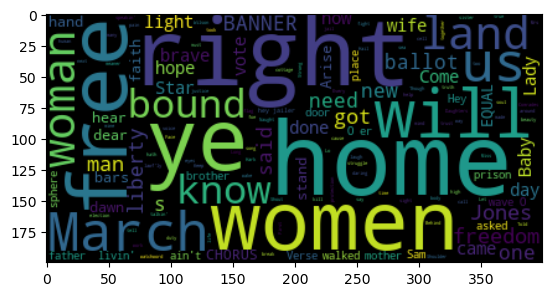

In [393]:
wordcloud = wc.WordCloud().generate(wave1_all_lyrics)
plt.imshow(wordcloud, interpolation = 'bilinear')

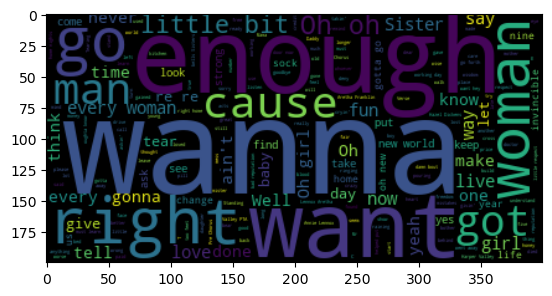

In [394]:
wordcloud = wc.WordCloud().generate(wave2_all_lyrics)
plt.imshow(wordcloud, interpolation = 'bilinear')

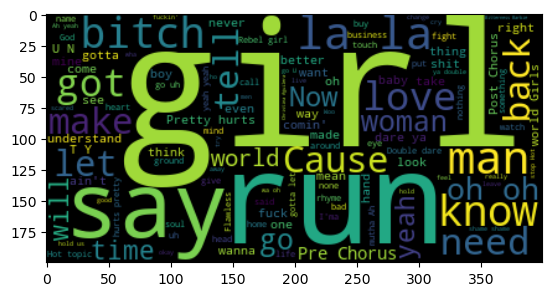

In [395]:
wordcloud = wc.WordCloud().generate(wave3_all_lyrics)
plt.imshow(wordcloud, interpolation = 'bilinear')

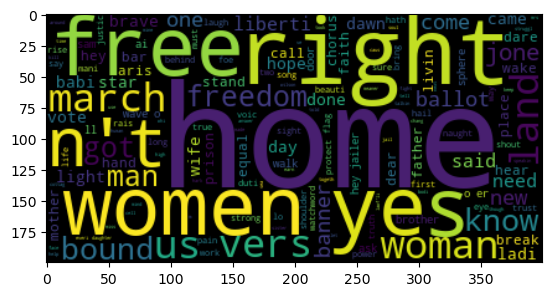

In [396]:
# all songs:

wordcloud = wc.WordCloud().generate(stemmed_str)
plt.imshow(wordcloud, interpolation = 'bilinear')

In [397]:
stemmed_str = ' '.join(stemmed)

filtered_str = ' '.join(filtered)

In [398]:
from PIL import Image

In [399]:
mask = np.array(Image.open('woman.jpg'))

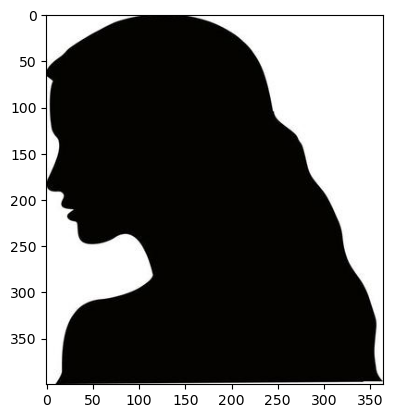

In [400]:
plt.imshow(mask)

In [401]:
mask = np.array(Image.open('woman.jpg'))
cloud = wc.WordCloud(scale = 8,
                     colormap = 'winter', 
                     mask = mask, 
                     background_color = 'white',
                    collocations = True).generate_from_text(stemmed_str)

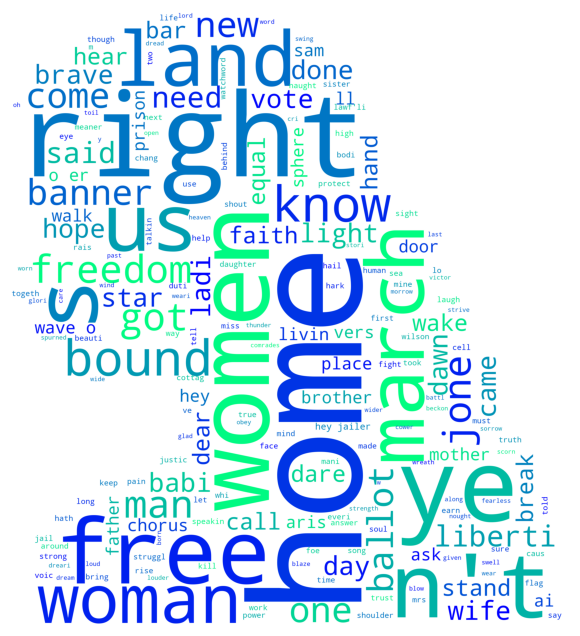

In [402]:
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [403]:
cloud = wc.WordCloud(scale = 8,
                     colormap = 'Reds', 
                     mask = mask, 
                     background_color = 'white',
                    collocations = True).generate_from_text(filtered_str)

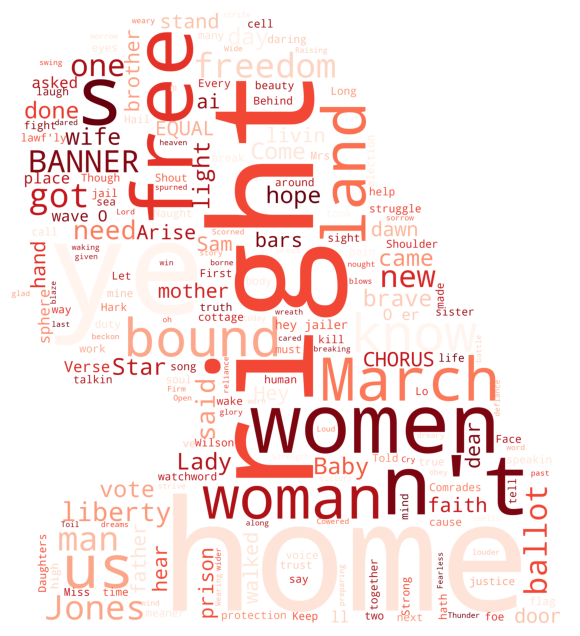

In [404]:
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [405]:
mask = np.array(Image.open('usa.jpg'))

In [406]:
cloud = wc.WordCloud(scale = 8,
                     colormap = 'PuRd', 
                     mask = mask, 
                     background_color = 'white',
                    collocations = True).generate_from_text(filtered_str)

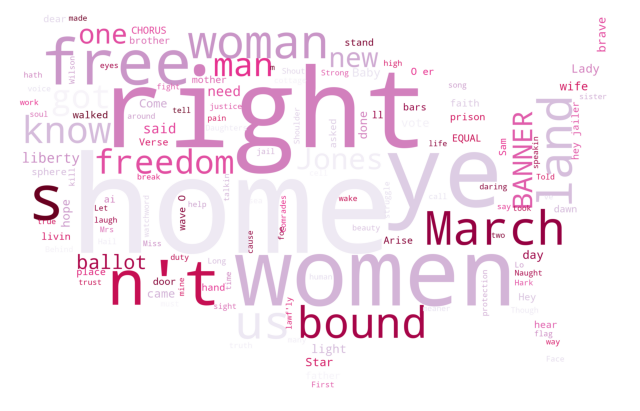

In [407]:
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [408]:
mask = np.array(Image.open('Screenshot 2024-06-21 232940.png'))

cloud = wc.WordCloud(scale = 8,
                     colormap = 'winter', 
                     mask = mask, 
                     background_color = 'white',
                    collocations = True).generate_from_text(filtered_str)

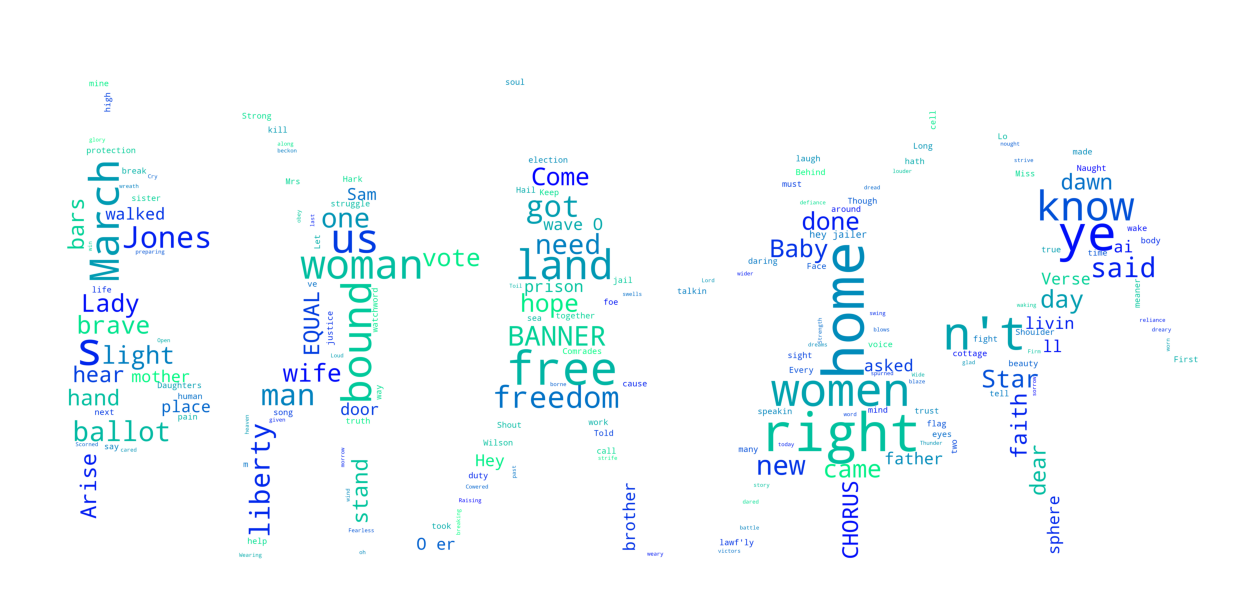

In [409]:
plt.figure(figsize = (16,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [410]:
# niceee